### Nama: Sabina Nurlatifah Aurelia
### NIM: 2209106002
### Kelas: Informatika A1 2022
### POSTTEST 5

Import package 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

Deklarasi File CSV

In [2]:
aurel = pd.read_csv('tornados.csv')
aurel

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3000,15.80,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0000,2.00,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0000,0.10,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0000,0.10,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0000,2.00,37,1,1,101,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,621922,2022,9,28,2022-09-28,13:32:00,America/Chicago,2022-09-28T18:32:00Z,FL,12,...,-80.8841,3.00,100,1,1,9,0,0,0,False
68689,621923,2022,9,30,2022-09-30,10:25:00,America/Chicago,2022-09-30T15:25:00Z,NC,37,...,-78.3011,0.74,20,1,1,19,0,0,0,False
68690,621924,2022,9,30,2022-09-30,13:22:00,America/Chicago,2022-09-30T18:22:00Z,NC,37,...,-76.7147,0.70,12,1,1,13,0,0,0,False
68691,621900,2022,9,4,2022-09-04,15:44:00,America/Chicago,2022-09-04T20:44:00Z,OH,39,...,-80.6555,0.07,15,1,1,99,0,0,0,False


Menampilkan informasi yang ada pada dataset

In [3]:
aurel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

Membersihkan data yang duplikat (data cleaning)

In [4]:
aurel.drop_duplicates(inplace= True)

### A. Supervised Learning

#### A1. Implementasi Metode

a. Support Vector Clustering menggunakan SVM

In [5]:
x2 = aurel[['inj', 'fat']]
y2 = aurel ['st']

## mengubah nilai NC --> Non- NC
y2 = np.where(y2 == 'OK','OK','Non-OK') 

Training set dan test set 80:20

In [6]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 30)

Train SVC model

In [7]:
svm = SVC(kernel = "linear")
svm.fit(x_train2, y_train2)

SVC(kernel='linear')

In [8]:
y_pred2 = svm.predict(x_test2) ##prediksi dengan x_test dari aurel

sv = svm.support_vectors_ #ambil nilai support vector dari objek
sv

array([[495.,   8.],
       [  0.,   7.],
       [145.,  72.],
       ...,
       [  0.,   0.],
       [  2.,   0.],
       [  0.,   0.]])

b. Regresi Linear

In [9]:
x = aurel[['inj']]
y = aurel ['fat']

mengatur perbandingan trainset dan test set 80:20

In [10]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)

melatih model

In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

melakukan prediksi

In [12]:
y_pred = reg.predict(x_test)

In [13]:
y_score = reg.score(x_test, y_test)
y_score

0.7083175773903041

##### A2. Hasil Prediksi

a. Klasifikasi

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr

In [15]:
## menghitung confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
cm

array([[12966,     0],
       [  773,     0]], dtype=int64)

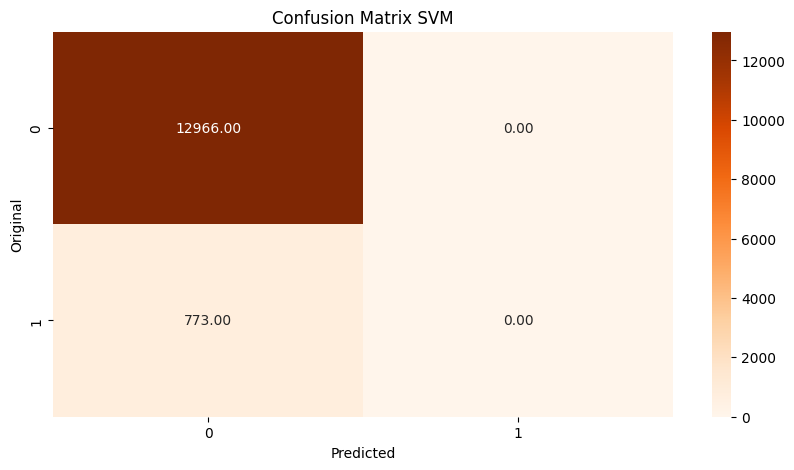

In [16]:
plt.figure(figsize= (10,5))
sns.heatmap(cm, annot= True, fmt= '.2f', cmap= 'Oranges')
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.title('Confusion Matrix SVM')
plt.show()

In [17]:
result = cr(y_test2, y_pred2)
print(result)

              precision    recall  f1-score   support

      Non-OK       0.94      1.00      0.97     12966
          OK       0.00      0.00      0.00       773

    accuracy                           0.94     13739
   macro avg       0.47      0.50      0.49     13739
weighted avg       0.89      0.94      0.92     13739



C:\Users\Luthfy\OneDrive\Documents\prak-kb-master\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luthfy\OneDrive\Documents\prak-kb-master\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luthfy\OneDrive\Documents\prak-kb-master\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Hasil prediksi diatas menunjukkan model klasifikasi memiliki tingkat akurasi yang tinggi (1.00), tetapi memiliki kinerja yang buruk dalam mengklasifikasikan kelas minoritas "OK"
dengan presisi, recall, dan f1-scorenya sebesar 0.00
model ini hanya bisa memprediksi mayoritas kelas "Non-OK" dan menghasilkan akurasi yang tinggi.

b. Regresi

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

#print(mae, mse, rmse, r2, sep ='\n')
print( f" MAE {mae}\n MSE {mse}\n RMSE {rmse}]\n R2 {r2}")

 MAE 0.08195577050689541
 MSE 0.48069313403802116
 RMSE 0.6933203689767243]
 R2 0.7083175773903041


Hasil prediksi diatas menunjukkan bahwa model regresi memiliki mae sekitar 0.081, MSE 0.480, RMSE 0.6933, dan R2 0.708. 
karena MAE, MSE, dan RMSE memiliki persentase kesalahan yang kecil dan R2 cukup tinggi mendekati angka 1, maka dianggap 
sebagai indikasi bahwa model cukup baik melakukan prediksi

##### A3. Plot Hasil Prediksi

a. SVM

C:\Users\Luthfy\OneDrive\Documents\prak-kb-master\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Age')

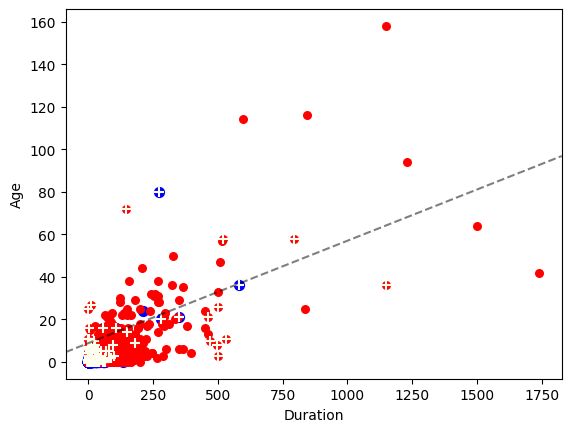

In [20]:
#plot data points dari OK
plt.scatter(x2[y2 == 'OK'].iloc[:,0],
            x2[y2 == 'OK'].iloc[:,1],
            s = 50, c = 'blue', marker ='o', label='OK')

#plot data points dari Non-OK
plt.scatter(x2[y2 == 'Non-OK'].iloc[:,0],
            x2[y2 == 'Non-OK'].iloc[:,1],
            s = 30, c = 'red', marker ='o', label='Non-OK')

plt.scatter(sv[:,0], sv[:, 1], s= 50,
            color = 'ivory', marker = '+' , label ='Support Vectors')

# garis Decision Boundary 
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x
# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,

linestyles=['--', '-', '--'])

#Plot data points dari support vector
# plt.scatter()

plt.xlabel("Duration")
plt.ylabel("Age")

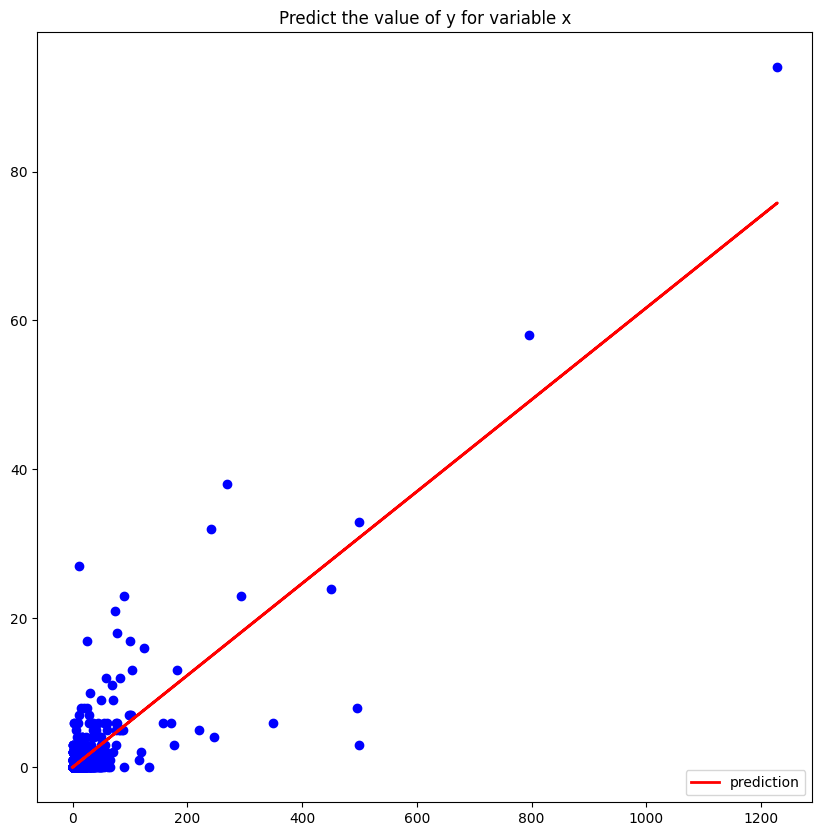

In [21]:
plt.figure(figsize = (10,10))
plt.scatter (x_test, y_test, c= "blue")
plt.plot(x_test, y_pred, c= "red", linewidth = 2, label = 'prediction')
plt.legend(loc= 'lower right')
plt.title('Predict the value of y for variable x')
plt.show()

##### B2. Cluster yang telah diprediksi

a. Tanpa label asli

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [23]:
x = aurel[['inj', 'fat']]
K = 2

kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(x)

cluster_labels = kmeans.labels_
aurel["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
aurel['cluster'] = aurel['cluster'].map(cluster_mapping)

In [24]:
## menghitung metriks clustering
def calculate_clustering_metrics(x, labels):
    ss_score = silhouette_score(x, labels)
    db_index = davies_bouldin_score(x, labels)
    ch_index = calinski_harabasz_score(x, labels)
    return ss_score, db_index, ch_index

#label clustering
labels = aurel['cluster']

## Hitung metriks clustering
ss, db, ch = calculate_clustering_metrics(x, labels)

#print hasil 
print(f"Silhouette Score: {ss:.2f}")
print(f"Davies-Bouldin Index: {db:.2f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")

Silhouette Score: 0.99
Davies-Bouldin Index: 0.45
Calinski-Harabasz Index: 87330.45


Dengan Silhouette Score sekitar 0.99, ini menunjukkan bahwa pengelompokan Anda memiliki kelompok yang terpisah dengan baik.
Nilai Davies-Bouldin Index sekitar 0.45, ini juga menunjukkan bahwa cluster Anda memiliki pemisahan yang baik.
Nilai Calinski-Harabasz Index sekitar 87330.45, ini menunjukkan bahwa pengelompokan Anda memiliki cluster-cluster yang sangat baik.
Hasil ini menunjukkan bahwa pengelompokan (clustering) yang diterapkan data memiliki cluster yang terpisah dengan baik dan setiap cluster memiliki kesamaan yang tinggi di antara anggotanya.

b. Label Asli

Ubah label kategorikal menjadi numerik

In [25]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah label kategorikal menjadi numerik
aurel['fc'] = label_encoder.fit_transform(aurel['fc'])

In [26]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

In [27]:
true_labels = aurel['fc']

# Evaluasi dengan metrik ARI
ari_score = adjusted_rand_score(true_labels, aurel['fc'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Evaluasi dengan metrik NMI
nmi_score = normalized_mutual_info_score(true_labels, aurel['fc'])
print(f"Normalized Mutual Information: {nmi_score:.2f}")

# Evaluasi dengan metrik homogeneity
homogeneity = homogeneity_score(true_labels, aurel['fc'])
print(f"Homogeneity: {homogeneity:.2f}")

# Evaluasi dengan metrik completeness
completeness = completeness_score(true_labels, aurel['fc'])
print(f"Completeness: {completeness:.2f}")

Adjusted Rand Index: 1.00
Normalized Mutual Information: 1.00
Homogeneity: 1.00
Completeness: 1.00


Hasil yang mendekati 1 pada semua metriks ini menunjukkan bahwa pengelompokan sangat baik dan cluster-cluster yang dihasilkan sangat sesuai dengan data. 

##### B3. Plot hasil clustering

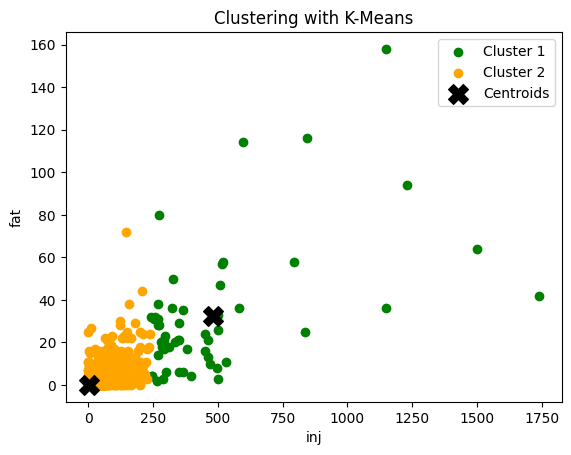

In [28]:
figsize=(10,8)
x = aurel[['inj', 'fat']]

# Plot data untuk setiap cluster
plt.scatter(x[aurel['cluster'] == 0]['inj'],
            x[aurel['cluster'] == 0]['fat'],
            c='green', label='Cluster 1')
plt.scatter(x[aurel['cluster'] == 1]['inj'],
            x[aurel['cluster'] == 1]['fat'],
            c='orange', label='Cluster 2')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X',
            s=200, c='black', label='Centroids')

plt.xlabel('inj')
plt.ylabel('fat')
plt.title('Clustering with K-Means')
plt.legend()
plt.show()